# Understanding the data
- DT.GPA.DPPG: Average grace period on new external debt commitments (years)
- DT.GPA.OFFT: Average grace period on new external debt commitments, official (years)
- DT.GPA.PRVT: Average grace period on new external debt commitments, private (years)
- DT.GRE.DPPG: Average grant element on new external debt commitments (%)
- DT.GRE.OFFT: Average grant element on new external debt commitments, official (%)
- DT.GRE.PRVT: Average grant element on new external debt commitments, private (%)
- DT.INR.DPPG: Average interest on new external debt commitments (%)
- DT.INR.OFFT: Average interest on new external debt commitments, official (%)
- DT.INR.PRVT: Average interest on new external debt commitments, private (%)
- DT.MAT.DPPG: Average maturity on new external debt commitments (years)
- DT.MAT.OFFT: Average maturity on new external debt commitments, official (years)
- DT.MAT.PRVT: Average maturity on new external debt commitments, private (years)
- DT.AMT: Amount
- DT.DIS: Disbursements
- DT.DOD: Debt outstanding and disbursed
- DT.INT: Interest payments
- DT.NFL: Net flows
- DT.NTR: Net transfers
- DT.TDS: Total debt service
- DT.DOD.ALLC.ZS: Concessional debt (% of total external debt)
- DT.CUR.OTHC.ZS: Currency composition of PPG debt, all other currencies (%)
- DT.CUR.DMAK.ZS: Currency composition of PPG debt, Deutsche mark (%)
- DT.CUR.EURO.ZS: Currency composition of PPG debt, Euro (%)
- DT.CUR.FFRC.ZS: Currency composition of PPG debt, French franc (%)
- DT.CUR.JYEN.ZS: Currency composition of PPG debt, Japanese yen (%)
- DT.CUR.MULC.ZS: Currency composition of PPG debt, Multiple currencies (%)
- DT.CUR.UKPS.ZS: Currency composition of PPG debt, Pound sterling (%)
- DT.CUR.SDRW.ZS: Currency composition of PPG debt, SDR (%)
- DT.CUR.SWFR.ZS: Currency composition of PPG debt, Swiss franc (%)
- DT.CUR.USDL.ZS: Currency composition of PPG debt, U.S. dollars (%)
- BN.CAB.XOKA.CD: Current account balance (current US$)
- DT.DSB.DPPG.CD: Debt buyback (current US$)CD: Debt buyback (current US$)

## The following abbreviations are used in the series codes:

- PPG: Public and Publicly Guaranteed
- DPPG: Public and Publicly Guaranteed Debt
- OFFT: Official Creditors
- PRVT: Private Creditors
- BLAT: Bilateral
- MLAT: Multilateral
- BLTC: Bilateral Concessional
- MLTC: Multilateral Concessional
- PBND: Bonds
- PCBK: Commercial Banks
- PROP: Other Private Creditors
- SDR: Special Drawing Rights
- ZS: Percentage
- CD: Current US Dollars
- AMT: Amount
- DIS: Disbursements
- DOD: Debt Outstanding and Disbursed
- INT: Interest Payments
- NFL: Net Flows
- NTR: Net Transfers
- TDS: Total Debt Service

In [50]:
import pandas as pd
import sqlite3
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('filtered_dataset.csv')
pd.set_option('display.notebook_repr_html', False)

In [3]:
def create_connection():
    return sqlite3.connect(':memory:')

In [4]:
conn = create_connection()

In [5]:
df.to_sql('filtered_dataset', conn, if_exists='replace', index=False)

77792

In [6]:
def execute_query(query, connection):
    return pd.read_sql_query(query, connection)

### Find the list of distinct countries.

In [7]:
unique_countries_query = "SELECT DISTINCT `Country Name` FROM filtered_dataset"
unique_countries = pd.read_sql_query(unique_countries_query, conn)
unique_countries.head()

  Country Name
0  Afghanistan
1      Albania
2      Algeria
3       Angola
4    Argentina

In [8]:
unique_countries.to_csv('unique_countries.txt', index=False, header=None, sep='\t')

### Find the list of unique series codes.

In [9]:
distinct_debt_indicators_query = "SELECT DISTINCT `Series Code` FROM filtered_dataset"
distinct_debt_indicators = pd.read_sql_query(distinct_debt_indicators_query, conn)
distinct_debt_indicators.head()

   Series Code
0  DT.GPA.DPPG
1  DT.GPA.OFFT
2  DT.GPA.PRVT
3  DT.GRE.DPPG
4  DT.GRE.OFFT

In [10]:
distinct_debt_indicators.to_csv('distinct_debt_indicators.txt', index=False, header=None, sep='\t')

### Find the total debt for each country for the year 2023 in amount.

In [11]:
total_debt_by_country_query = """
SELECT `Country Name`, SUM(`2023`) as TotalDebt
FROM filtered_dataset
WHERE `Series Code` LIKE '%AMT%'
GROUP BY `Country Name`;
"""

total_debt_by_country = pd.read_sql_query(total_debt_by_country_query, conn)
total_debt_by_country.head()

  Country Name     TotalDebt
0  Afghanistan  8.787026e+08
1      Albania  7.372980e+09
2      Algeria  1.000648e+09
3       Angola  7.786784e+10
4    Argentina  3.046993e+11

In [12]:
total_debt_by_country.to_csv('total_debt_by_country_2023.csv', index=False)

### Find the total debt for each country for the year 2023.

In [13]:
total_debt_query = """
SELECT `Country Name`, SUM(`2023`) as TotalDebt
FROM filtered_dataset
GROUP BY `Country Name`;
"""

total_debt = pd.read_sql_query(total_debt_query, conn)
total_debt.head()

  Country Name     TotalDebt
0  Afghanistan  2.796974e+09
1      Albania  2.374756e+10
2      Algeria  2.433306e+09
3       Angola  2.818395e+11
4    Argentina  8.673901e+11

In [14]:
total_debt.to_csv('total_debt_overall_2023.csv', index=False)

### Find the country with highest debt taken in amount in the year 2023.

In [15]:
highest_debt_country_query = """
SELECT `Country Name`, SUM(`2023`) as TotalDebt
FROM filtered_dataset
WHERE `Series Code` LIKE '%AMT%'
GROUP BY `Country Name`
ORDER BY TotalDebt DESC
LIMIT 1;
"""

highest_debt_country = pd.read_sql_query(highest_debt_country_query, conn)
highest_debt_country

          Country Name     TotalDebt
0  Low & middle income  4.240326e+12

### Find the average debt of each country by series codes.

In [16]:
average_debt_by_series_code_query = """
SELECT `Series Code`, AVG(`2023`) as AverageDebt
FROM filtered_dataset
GROUP BY `Series Code`;
"""

average_debt_by_series_code = pd.read_sql_query(average_debt_by_series_code_query, conn)

average_debt_by_series_code

           Series Code  AverageDebt
0       BM.GSR.TOTL.CD          NaN
1       BN.CAB.XOKA.CD          NaN
2    BX.GRT.EXTA.CD.DT          NaN
3    BX.GRT.TECH.CD.DT          NaN
4       BX.GSR.TOTL.CD          NaN
..                 ...          ...
567     FI.RES.TOTL.CD          NaN
568  FI.RES.TOTL.DT.ZS          NaN
569     FI.RES.TOTL.MO          NaN
570     NY.GNP.MKTP.CD          NaN
571        SP.POP.TOTL          NaN

[572 rows x 2 columns]

### Find the average debt of each country by series codes (remving null).

In [17]:
average_debt_by_series_code_query = """
SELECT `Series Code`, AVG(`2023`) as Average_Debt
FROM filtered_dataset
GROUP BY `Series Code`
HAVING AVG(`2023`) IS NOT NULL;
"""

average_debt_by_series_code = pd.read_sql_query(average_debt_by_series_code_query, conn)
average_debt_by_series_code.dropna(subset=['Average_Debt'], inplace=True)

In [18]:
average_debt_by_series_code.head()

           Series Code  Average_Debt
0       DT.AMT.BLAT.CD  2.176784e+09
1    DT.AMT.BLAT.GG.CD  1.675064e+09
2   DT.AMT.BLAT.OPS.CD  6.823171e+08
3  DT.AMT.BLAT.PRVG.CD  1.397149e+07
4    DT.AMT.BLAT.PS.CD  2.175140e+09

In [19]:
average_debt_by_series_code.to_csv('average_debt_by_series_code.csv', index=False)

### Find the countries in the highest order of their principal repayments.

In [20]:
principal_repayments_query = """
SELECT `Country Name`, `2023` as PrincipalRepayments
FROM filtered_dataset
WHERE `Series Name` LIKE '%Principal repayments%'
AND `2023` IS NOT NULL
ORDER BY `2023` DESC;
"""

principal_repayments = pd.read_sql_query(principal_repayments_query, conn)

In [21]:
principal_repayments.head()

          Country Name  PrincipalRepayments
0  Low & middle income         8.440000e+11
1        Middle income         8.200000e+11
2  Upper middle income         6.160000e+11
3  Low & middle income         5.630000e+11
4        Middle income         5.470000e+11

In [22]:
principal_repayments.to_csv('principal_repayments.csv', index=False)

In [23]:
highest_principal_repayment = principal_repayments.iloc[0]
print("Country with the highest principal repayment in 2023: {}".format(highest_principal_repayment))

Country with the highest principal repayment in 2023: Country Name           Low & middle income
PrincipalRepayments         844000000000.0
Name: 0, dtype: object


### Find the total debt series cde wise excluding the repayments.

In [24]:
most_common_debt_indicator_query = """
SELECT `Series Code`, `Series Name`, SUM(`2023`) as TotalDebt
FROM filtered_dataset
WHERE `Series Name` NOT LIKE '%Principal repayments%'
AND `2023` IS NOT NULL
GROUP BY `Series Code`, `Series Name`
ORDER BY TotalDebt DESC
"""

most_common_debt_indicator = pd.read_sql_query(most_common_debt_indicator_query, conn)

In [25]:
most_common_debt_indicator.head()

      Series Code                                        Series Name  \
0  DT.TDS.DECT.CD  Debt service on external debt, total (TDS, cur...   
1  DT.TDS.DLXF.CD  Debt service on external debt, long-term (TDS,...   
2  DT.TDS.DPNG.CD  Debt service on external debt, private nonguar...   
3  DT.TDS.PNGC.CD  PNG, commercial banks and other creditors (TDS...   
4  DT.AMT.PNGC.CD  PNG, commercial banks and other creditors (AMT...   

      TotalDebt  
0  6.011122e+12  
1  5.819224e+12  
2  3.523855e+12  
3  2.929574e+12  
4  2.475367e+12  

In [26]:
most_common_debt_indicator.to_csv('most_common_debt_indicator.csv', index=False)

In [27]:
highest_debt_indicator = most_common_debt_indicator.iloc[0]
print("Highest debt indicator Series Name - {}, Series Code - {} and debt is {}".format(highest_debt_indicator[1],
                                                                                       highest_debt_indicator[0],
                                                                                       highest_debt_indicator[2]))

Highest debt indicator Series Name - Debt service on external debt, total (TDS, current US$), Series Code - DT.TDS.DECT.CD and debt is 6011122353657.3


### Find the average interest rate on new external debt commitments for each country in the year 2022, and order the results from highest to lowest average interest rate.

In [28]:
average_interest_rate_query = """
SELECT `Country Name`, AVG(`2022`) as AverageInterestRate
FROM filtered_dataset
WHERE `Series Code` = 'DT.INR.DPPG'
GROUP BY `Country Name`
ORDER BY AverageInterestRate DESC;
"""

average_interest_rate = pd.read_sql_query(average_interest_rate_query, conn)
average_interest_rate.to_csv('average_interest_rate_2022.csv', index=False)

In [29]:
average_interest_rate.head()

  Country Name  AverageInterestRate
0      Turkiye               6.7996
1   Azerbaijan               6.7818
2       Brazil               6.4215
3       Angola               5.2801
4       Uganda               4.5918

### Determine the countries with the highest debt service on external debt (public and publicly guaranteed) in each year from 2019 to 2023, and display the country name, year, and debt service amount.

In [30]:
highest_debt_service_query = """
SELECT `Country Name`, 
       `2019` as DebtService2019,
       `2020` as DebtService2020,
       `2021` as DebtService2021,
       `2022` as DebtService2022,
       `2023` as DebtService2023
FROM filtered_dataset
WHERE `Series Code` = 'DT.TDS.DPPG.CD'
ORDER BY DebtService2019 DESC, DebtService2020 DESC, DebtService2021 DESC, DebtService2022 DESC, DebtService2023 DESC;
"""

highest_debt_service = pd.read_sql_query(highest_debt_service_query, conn)
highest_debt_service.to_csv('highest_debt_service.csv', index=False)

In [31]:
highest_debt_service.head()

                                        Country Name  DebtService2019  \
0                                Low & middle income     3.840000e+11   
1                                      Middle income     3.790000e+11   
2                                Upper middle income     2.780000e+11   
3  Latin America & Caribbean (excluding high income)     1.400000e+11   
4                                Lower middle income     1.010000e+11   

   DebtService2020  DebtService2021  DebtService2022  DebtService2023  
0     3.990000e+11     4.070000e+11     4.140000e+11     4.330000e+11  
1     3.940000e+11     4.000000e+11     4.080000e+11     4.230000e+11  
2     2.870000e+11     2.910000e+11     2.990000e+11     2.750000e+11  
3     1.090000e+11     1.150000e+11     9.078931e+10     1.150000e+11  
4     1.070000e+11     1.100000e+11     1.090000e+11     1.490000e+11  

### Find the countries with the largest percentage increase in external debt stocks between 2019 and 2022, and show the percentage change alongside the actual debt stock values for those two years.

In [32]:
debt_stock_increase_query = """
SELECT `Country Name`, 
       `2019` as DebtStock2019,
       `2022` as DebtStock2022,
       (`2022` - `2019`) / `2019` * 100 as PercentageIncrease
FROM filtered_dataset
WHERE `Series Code` = 'DT.DOD.DECT.CD' AND `2019` > 0
ORDER BY PercentageIncrease DESC;
"""

debt_stock_increase = pd.read_sql_query(debt_stock_increase_query, conn)
debt_stock_increase.to_csv('debt_stock_increase.csv', index=False)

In [33]:
debt_stock_increase.head()

         Country Name  DebtStock2019  DebtStock2022  PercentageIncrease
0          Uzbekistan   2.295738e+10   4.909947e+10          113.872247
1  Iran, Islamic Rep.   4.855393e+09   9.950397e+09          104.934950
2                Fiji   1.344387e+09   2.536846e+09           88.699144
3               Benin   3.919943e+09   7.307162e+09           86.409910
4             Senegal   1.924302e+10   3.212624e+10           66.950113

### Calculate the average interest payments on external debt for each country over the last 5 years.

In [34]:
public_sector_debt_query = """
SELECT `Country Name`,
       MAX(CASE WHEN `Series Code` = 'DT.DOD.PUBS.CD' THEN `2023` END) as LongTermPublicSectorDebt,
       MAX(CASE WHEN `Series Code` = 'DT.DOD.DECT.CD' THEN `2023` END) as TotalExternalDebtStocks,
       MAX(CASE WHEN `Series Code` = 'DT.DOD.PUBS.CD' THEN `2023` END) / 
       MAX(CASE WHEN `Series Code` = 'DT.DOD.DECT.CD' THEN `2023` END) * 100 as PublicSectorDebtPercentage
FROM filtered_dataset
WHERE `Series Code` IN ('DT.DOD.PUBS.CD', 'DT.DOD.DECT.CD')
  AND `2023` IS NOT NULL
GROUP BY `Country Name`
HAVING PublicSectorDebtPercentage IS NOT NULL
ORDER BY PublicSectorDebtPercentage DESC;
"""

public_sector_debt = pd.read_sql_query(public_sector_debt_query, conn)
public_sector_debt.to_csv('public_sector_debt.csv', index=False)

In [35]:
interest_payments_query = """
SELECT `Country Name`,
       AVG(CASE WHEN `Series Code` = 'DT.INT.DECT.CD' THEN `2019` END) as InterestPayments2019,
       AVG(CASE WHEN `Series Code` = 'DT.INT.DECT.CD' THEN `2020` END) as InterestPayments2020,
       AVG(CASE WHEN `Series Code` = 'DT.INT.DECT.CD' THEN `2021` END) as InterestPayments2021,
       AVG(CASE WHEN `Series Code` = 'DT.INT.DECT.CD' THEN `2022` END) as InterestPayments2022,
       AVG(CASE WHEN `Series Code` = 'DT.INT.DECT.CD' THEN `2023` END) as InterestPayments2023
FROM filtered_dataset
WHERE `Series Code` = 'DT.INT.DECT.CD'
GROUP BY `Country Name`;
"""

interest_payments = pd.read_sql_query(interest_payments_query, conn)
interest_payments.to_csv('interest_payments.csv', index=False)

In [36]:
interest_payments.head()

  Country Name  InterestPayments2019  InterestPayments2020  \
0  Afghanistan          1.478334e+07          1.033427e+07   
1      Albania          1.220046e+08          1.569420e+08   
2      Algeria          7.703609e+07          5.648126e+07   
3       Angola          2.928890e+09          2.682127e+09   
4    Argentina          1.402283e+10          7.725405e+09   

   InterestPayments2021  InterestPayments2022 InterestPayments2023  
0          6.814868e+06          1.161951e+07                 None  
1          1.275979e+08          1.658121e+08                 None  
2          4.559694e+07          1.466356e+08                 None  
3          2.350153e+09          2.757731e+09                 None  
4          5.475223e+09          7.046464e+09                 None  

### Find the countries with the highest debt service on private nonguaranteed external debt in the most recent year.

In [37]:
public_sector_debt.head()

Empty DataFrame
Columns: [Country Name, LongTermPublicSectorDebt, TotalExternalDebtStocks, PublicSectorDebtPercentage]
Index: []

In [38]:
private_nonguaranteed_debt_query = """
SELECT `Country Name`,
       MAX(CASE WHEN `Series Code` = 'DT.TDS.DPNG.CD' THEN `2023` END) as PrivateNonguaranteedDebtService
FROM filtered_dataset
WHERE `Series Code` = 'DT.TDS.DPNG.CD'
GROUP BY `Country Name`
ORDER BY PrivateNonguaranteedDebtService DESC
LIMIT 10;
"""

private_nonguaranteed_debt = pd.read_sql_query(private_nonguaranteed_debt_query, conn)
private_nonguaranteed_debt.to_csv('private_nonguaranteed_debt.csv', index=False)

In [39]:
private_nonguaranteed_debt.head()

                                        Country Name  \
0                                Low & middle income   
1                                      Middle income   
2                                Upper middle income   
3        East Asia & Pacific (excluding high income)   
4  Latin America & Caribbean (excluding high income)   

   PrivateNonguaranteedDebtService  
0                     6.820000e+11  
1                     6.620000e+11  
2                     5.310000e+11  
3                     2.310000e+11  
4                     1.870000e+11  

### Calculate the average maturity of new external debt commitments for each country over the last 5 years.

In [40]:
average_maturity_query = """
SELECT `Country Name`,
       AVG(CASE WHEN `Series Code` = 'DT.MAT.DPPG' THEN `2019` END) as AverageMaturity2019,
       AVG(CASE WHEN `Series Code` = 'DT.MAT.DPPG' THEN `2020` END) as AverageMaturity2020,
       AVG(CASE WHEN `Series Code` = 'DT.MAT.DPPG' THEN `2021` END) as AverageMaturity2021,
       AVG(CASE WHEN `Series Code` = 'DT.MAT.DPPG' THEN `2022` END) as AverageMaturity2022,
       AVG(CASE WHEN `Series Code` = 'DT.MAT.DPPG' THEN `2023` END) as AverageMaturity2023
FROM filtered_dataset
WHERE `Series Code` = 'DT.MAT.DPPG'
GROUP BY `Country Name`;
"""

average_maturity = pd.read_sql_query(average_maturity_query, conn)
average_maturity.to_csv('average_maturity.csv', index=False)

In [41]:
average_maturity.head()

  Country Name  AverageMaturity2019  AverageMaturity2020  AverageMaturity2021  \
0  Afghanistan              39.8333               0.0000               0.0000   
1      Albania              16.0725              10.3369              11.7437   
2      Algeria               0.0000               0.0000               0.0000   
3       Angola              17.4795              11.9531               9.8551   
4    Argentina              13.2264               5.7568              21.4875   

   AverageMaturity2022 AverageMaturity2023  
0               0.0000                None  
1              17.4505                None  
2               0.0000                None  
3              10.7593                None  
4               6.7254                None  

### Find the countries with a concessional debt percentage higher than 50% in 2021

In [42]:
high_concessional_debt_query = """
SELECT `Country Name`, `2021` as ConcessionalDebtPercentage
FROM filtered_dataset
WHERE `Series Code` = 'DT.DOD.ALLC.ZS' AND `2021` > 50;
"""

high_concessional_debt = pd.read_sql_query(high_concessional_debt_query, conn)
high_concessional_debt.to_csv('high_concessional_debt.csv', index=False)
high_concessional_debt.head()

  Country Name  ConcessionalDebtPercentage
0      Comoros                     72.4457
1      Eritrea                     84.1525
2        Haiti                     76.2317
3   Madagascar                     56.2520
4       Malawi                     61.6865

### Find the countries with the highest percentage of debt in U.S. dollars in 2022.

In [43]:
highest_usd_debt_query = """
SELECT `Country Name`, `2022` as USDDebtPercentage
FROM filtered_dataset
WHERE `Series Code` = 'DT.CUR.USDL.ZS'
ORDER BY `2022` DESC
LIMIT 5;
"""

highest_usd_debt = pd.read_sql_query(highest_usd_debt_query, conn)
highest_usd_debt.to_csv('highest_usd_debt.csv', index=False)
highest_usd_debt.head()

  Country Name  USDDebtPercentage
0      Jamaica            98.9628
1     Paraguay            98.7167
2       Belize            98.5601
3    St. Lucia            98.5267
4        Haiti            98.2848

### Calculate the year-over-year change in external debt stocks for each country between 2021 and 2022.

In [44]:
debt_stocks_change_query = """
SELECT 
    fd1.`Country Name`,
    fd1.`2022` - fd2.`2021` as DebtStocksChange
FROM 
    filtered_dataset fd1
    JOIN filtered_dataset fd2 ON fd1.`Country Name` = fd2.`Country Name`
WHERE
    fd1.`Series Code` = 'DT.DOD.DECT.CD' AND fd2.`Series Code` = 'DT.DOD.DECT.CD';
"""

debt_stocks_change = pd.read_sql_query(debt_stocks_change_query, conn)
debt_stocks_change.to_csv('debt_stocks_change.csv', index=False)
debt_stocks_change.head()

  Country Name  DebtStocksChange
0  Afghanistan     -1.625371e+08
1      Albania     -5.998881e+08
2      Algeria     -2.495218e+08
3       Angola     -5.980100e+09
4    Argentina      2.000000e+09

### Find the countries with the highest ratio of external debt stocks to exports of goods, services, and primary income in 2020.

In [45]:
debt_to_exports_ratio_query = """
SELECT `Country Name`, `2020` as DebtToExportsRatio
FROM filtered_dataset
WHERE `Series Code` = 'DT.DOD.DECT.EX.ZS'
ORDER BY `2020` DESC
LIMIT 5;
"""

debt_to_exports_ratio = pd.read_sql_query(debt_to_exports_ratio_query, conn)
debt_to_exports_ratio.to_csv('debt_to_exports_ratio.csv', index=False)
debt_to_exports_ratio.head()

            Country Name  DebtToExportsRatio
0             Mozambique         1280.194265
1                Lebanon          664.586363
2             Montenegro          602.949586
3  Sao Tome and Principe          568.135445
4            Gambia, The          506.456292

### Calculate the average maturity on new external debt commitments for each country in the last 3 years (2021-2023).

In [46]:
avg_maturity_query = """
SELECT 
    `Country Name`,
    AVG(`2021`) as AvgMaturity2021,
    AVG(`2022`) as AvgMaturity2022,
    AVG(`2023`) as AvgMaturity2023
FROM filtered_dataset
WHERE `Series Code` = 'DT.MAT.DPPG'
GROUP BY `Country Name`;
"""

avg_maturity = pd.read_sql_query(avg_maturity_query, conn)
avg_maturity.to_csv('avg_maturity.csv', index=False)
avg_maturity.head()

  Country Name  AvgMaturity2021  AvgMaturity2022 AvgMaturity2023
0  Afghanistan           0.0000           0.0000            None
1      Albania          11.7437          17.4505            None
2      Algeria           0.0000           0.0000            None
3       Angola           9.8551          10.7593            None
4    Argentina          21.4875           6.7254            None

### Find the countries with the highest percentage of debt owed to private creditors in 2022.

In [47]:
private_creditors_debt_query = """
SELECT 
    fd1.`Country Name`,
    fd1.`2022` / fd2.`2022` * 100 as PrivateCreditorsDebtPercentage
FROM 
    filtered_dataset fd1
    JOIN filtered_dataset fd2 ON fd1.`Country Name` = fd2.`Country Name`
WHERE
    fd1.`Series Code` = 'DT.DOD.PRVT.CD' AND fd2.`Series Code` = 'DT.DOD.DECT.CD'
ORDER BY PrivateCreditorsDebtPercentage DESC
LIMIT 5;
"""

private_creditors_debt = pd.read_sql_query(private_creditors_debt_query, conn)
private_creditors_debt.to_csv('private_creditors_debt.csv', index=False)
private_creditors_debt.head()

         Country Name  PrivateCreditorsDebtPercentage
0              Angola                       62.038694
1  Dominican Republic                       58.182055
2             Lebanon                       46.761816
3        South Africa                       46.623297
4       Cote d'Ivoire                       46.440690

### Calculate the total debt service on long-term external debt for each country in the last 5 years (2019-2023).

In [48]:
long_term_debt_service_query = """
SELECT 
    `Country Name`,
    SUM(`2019`) as DebtService2019,
    SUM(`2020`) as DebtService2020,
    SUM(`2021`) as DebtService2021,
    SUM(`2022`) as DebtService2022,
    SUM(`2023`) as DebtService2023
FROM filtered_dataset
WHERE `Series Code` = 'DT.TDS.DLXF.CD'
GROUP BY `Country Name`;
"""

long_term_debt_service = pd.read_sql_query(long_term_debt_service_query, conn)
long_term_debt_service.to_csv('long_term_debt_service.csv', index=False)
long_term_debt_service.head()

  Country Name  DebtService2019  DebtService2020  DebtService2021  \
0  Afghanistan     3.980704e+07     3.455740e+07     1.923400e+07   
1      Albania     6.095507e+08     1.093737e+09     8.074701e+08   
2      Algeria     1.428169e+08     1.418812e+08     1.689630e+08   
3       Angola     1.062271e+10     7.700514e+09     9.809415e+09   
4    Argentina     4.134058e+10     2.729333e+10     1.996969e+10   

   DebtService2022  DebtService2023  
0     1.201700e+07     1.284251e+08  
1     6.502827e+08     1.823996e+09  
2     1.788039e+08     1.711290e+08  
3     1.508876e+10     1.288871e+10  
4     1.311167e+10     4.279986e+10  

### Find the countries with the highest average interest rate on new external debt commitments from official creditors in 2021.

In [49]:
official_creditors_interest_query = """
SELECT `Country Name`, AVG(`2021`) as AvgInterestRate
FROM filtered_dataset
WHERE `Series Code` = 'DT.INR.OFFT'
GROUP BY `Country Name`
ORDER BY AvgInterestRate DESC
LIMIT 5;
"""

official_creditors_interest = pd.read_sql_query(official_creditors_interest_query, conn)
official_creditors_interest.to_csv('official_creditors_interest.csv', index=False)
official_creditors_interest.head()

   Country Name  AvgInterestRate
0  South Africa           4.4540
1         Gabon           4.1910
2      Maldives           3.5677
3  Turkmenistan           3.3092
4       Vanuatu           3.0000

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Load data
df = pd.read_csv("filtered_dataset.csv")

### Debt Service Trends over Time for India

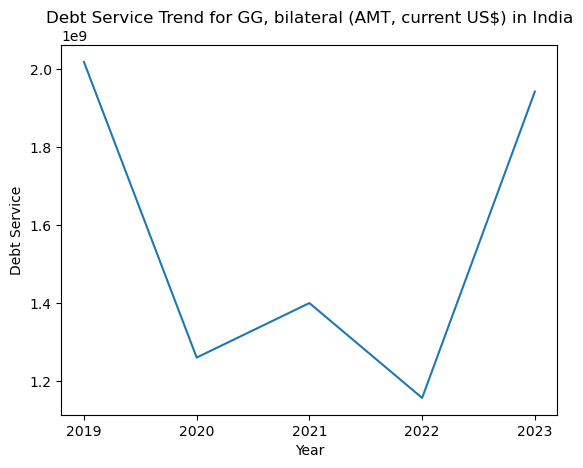

In [87]:
india_data = df[df["Country Name"] == "India"]
series_codes = india_data["Series Code"].unique()

random_series_code = random.choice(series_codes)

selected_data = india_data[india_data["Series Code"] == random_series_code]
debt_service_data = selected_data.iloc[:, 4:]  # Select columns from the 5th column onwards
debt_service_data["Series Name"] = selected_data["Series Name"]
debt_service_data = debt_service_data.melt(id_vars=["Series Name"], var_name="Year", value_name="Debt Service")

# Create line plot
sns.lineplot(x="Year", y="Debt Service", data=debt_service_data)
plt.title(f"Debt Service Trend for {selected_data['Series Name'].iloc[0]} in India")
plt.show()

### Line graph - Year-wise comparison of Average grace period on new external debt commitments (years) for multiple countries

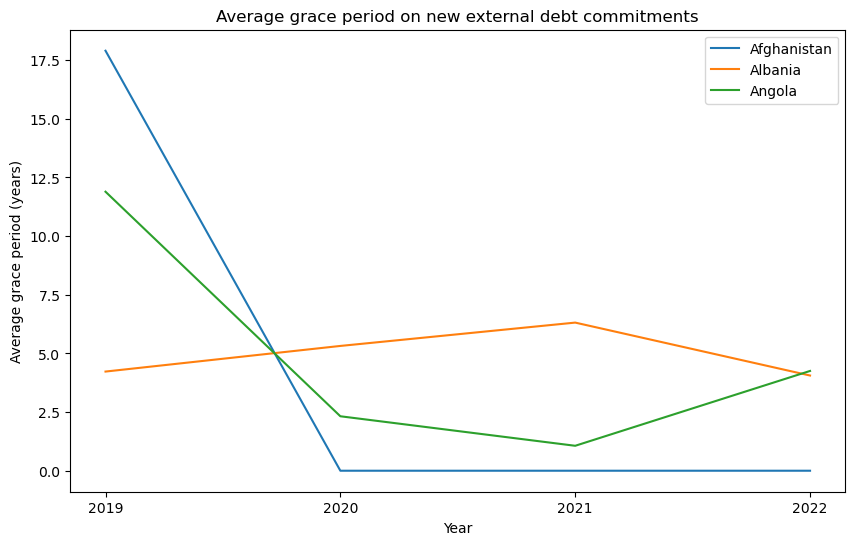

In [88]:
countries = ['Afghanistan', 'Albania', 'Angola']  # Select countries of interest
series_code = 'DT.GPA.DPPG'  # Series code for Average grace period on new external debt commitments (years)

plt.figure(figsize=(10, 6))
for country in countries:
    data = df[(df['Country Name'] == country) & (df['Series Code'] == series_code)]
    plt.plot(data.columns[4:], data.iloc[0, 4:], label=country)

plt.xlabel('Year')
plt.ylabel('Average grace period (years)')
plt.title('Average grace period on new external debt commitments')
plt.legend()
plt.show()

### Stacked bar graph - Comparison of Currency composition of PPG debt for a specific country across different years

<Figure size 1000x600 with 0 Axes>

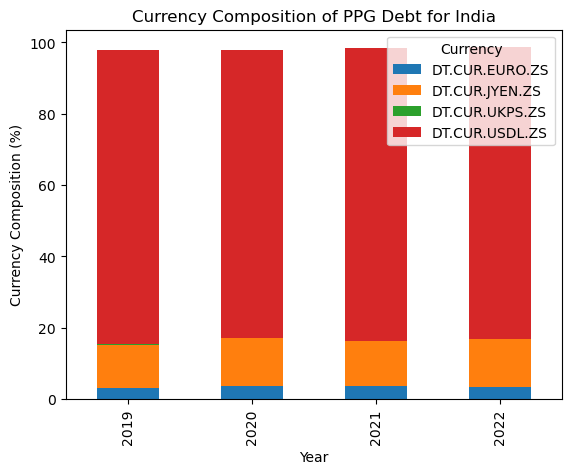

In [78]:
country = 'India'  # Select a country
currency_codes = ['DT.CUR.EURO.ZS', 'DT.CUR.JYEN.ZS', 'DT.CUR.UKPS.ZS', 'DT.CUR.USDL.ZS']  # Select currency codes
years = ['2019', '2020', '2021', '2022']  # Select years of interest

data = df[(df['Country Name'] == country) & (df['Series Code'].isin(currency_codes))]
data = data[['Series Code'] + years].set_index('Series Code')
data = data.T

plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Currency Composition (%)')
plt.title(f'Currency Composition of PPG Debt for {country}')
plt.legend(title='Currency')
plt.show()

### Area chart - Evolution of External debt stocks (% of GNI) over time for a selected country

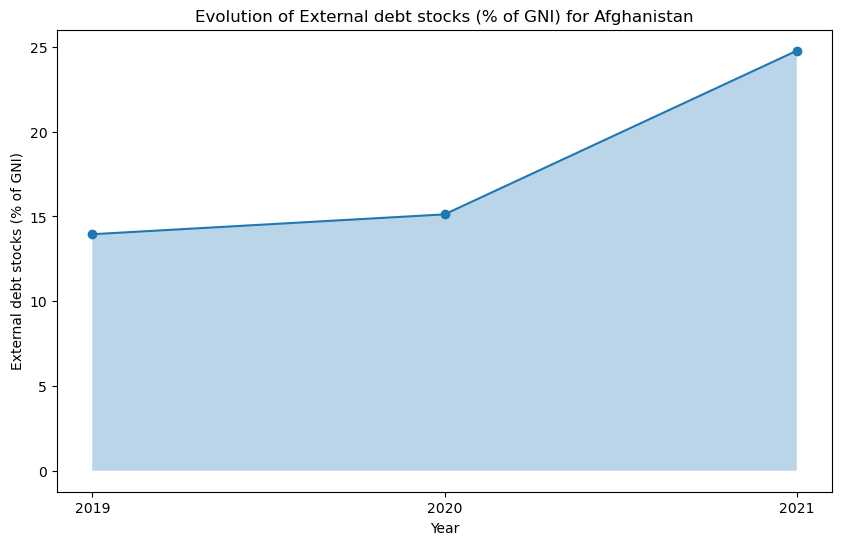

In [84]:
country = 'Afghanistan'  # Select a country
series_code = 'DT.DOD.DECT.GN.ZS'  # Series code for External debt stocks (% of GNI)

data = df[(df['Country Name'] == country) & (df['Series Code'] == series_code)]
years = data.columns[4:]
values = data.iloc[0, 4:].astype(float)  # Convert values to float

# Remove missing values
valid_mask = ~values.isnull()
years = years[valid_mask]
values = values[valid_mask]

plt.figure(figsize=(10, 6))
plt.plot(years, values, marker='o')
plt.fill_between(years, values, alpha=0.3)
plt.xlabel('Year')
plt.ylabel('External debt stocks (% of GNI)')
plt.title(f'Evolution of External debt stocks (% of GNI) for {country}')
plt.show()

### Grouped bar graph - Comparison of Disbursements on external debt from different sources for a chosen country in a specific year

<Figure size 1000x600 with 0 Axes>

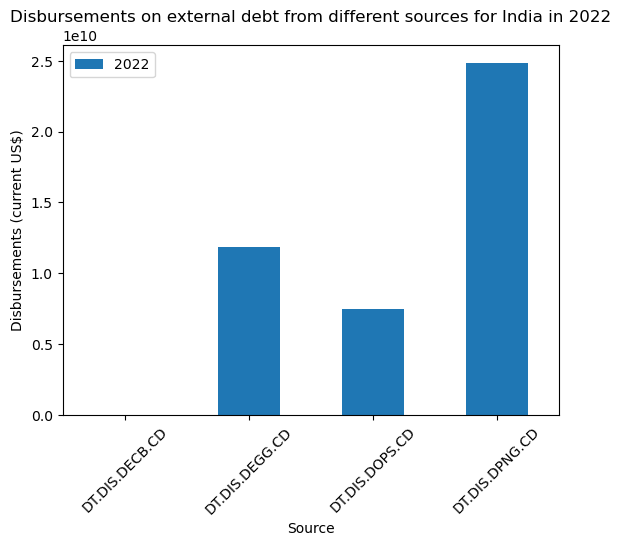

In [82]:
country = 'India'  # Select a country
year = '2022'  # Select a year
sources = ['DT.DIS.DECB.CD', 'DT.DIS.DEGG.CD', 'DT.DIS.DOPS.CD', 'DT.DIS.DPNG.CD']  # Select source codes

data = df[(df['Country Name'] == country) & (df['Series Code'].isin(sources))]
data = data[['Series Code', year]].set_index('Series Code')

plt.figure(figsize=(10, 6))
data.plot(kind='bar')
plt.xlabel('Source')
plt.ylabel('Disbursements (current US$)')
plt.title(f'Disbursements on external debt from different sources for {country} in {year}')
plt.xticks(rotation=45)
plt.show()

### Pie chart - Breakdown of External debt stocks by creditor type for a selected country in the latest available year

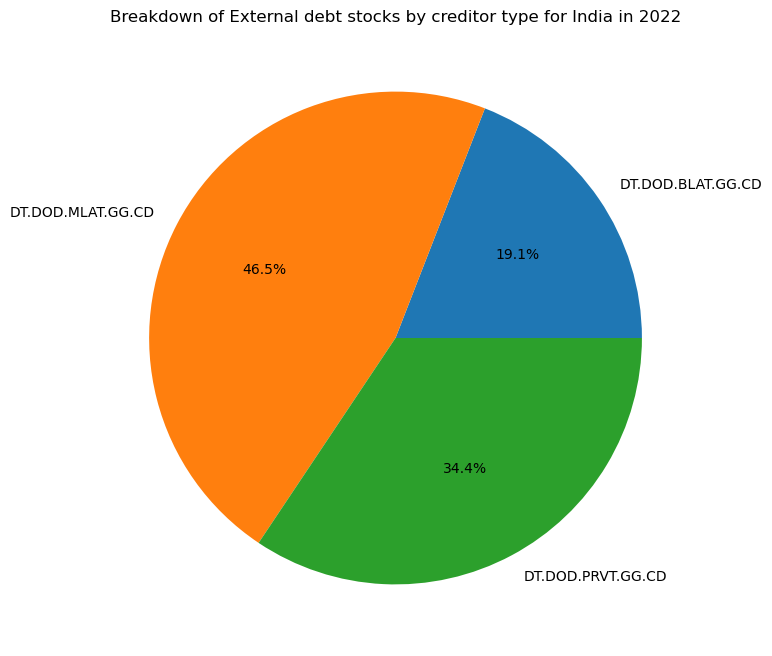

In [85]:
country = 'India'  # Select a country
year = '2022'  # Select the latest available year
creditor_types = ['DT.DOD.BLAT.GG.CD', 'DT.DOD.MLAT.GG.CD', 'DT.DOD.PRVT.GG.CD']  # Select creditor type codes

data = df[(df['Country Name'] == country) & (df['Series Code'].isin(creditor_types))]
data = data[['Series Code', year]].set_index('Series Code')

if not data.empty:
    plt.figure(figsize=(8, 8))
    plt.pie(data[year], labels=data.index, autopct='%1.1f%%')
    plt.title(f'Breakdown of External debt stocks by creditor type for {country} in {year}')
    plt.show()
else:
    print(f"No data available for {country} in {year} for the selected creditor types.")